# Motion Analysis


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
trailer_2022_10 = pd.read_csv("C:/Users/Kristopher/Downloads/2022-10-27_11-07-26(1)/Gravity.csv")

In [3]:
trailer_2022_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347196 entries, 0 to 347195
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             347196 non-null  int64  
 1   seconds_elapsed  347196 non-null  float64
 2   z                347196 non-null  float64
 3   y                347196 non-null  float64
 4   x                347196 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 13.2 MB


In [4]:
trailer_2022_10.head()

,time,seconds_elapsed,z,y,x
0,1666868846670022400,0.027022,7.562531,2.309869,5.800260
1,1666868846680094500,0.037094,7.559167,2.295831,5.810210
2,1666868846690166500,0.047167,7.557531,2.282134,5.817725
3,1666868846700238600,0.057239,7.558675,2.272433,5.820044
4,1666868846710310400,0.067310,7.560982,2.269321,5.818255


## Timestamp Coding

According to Dr. Kelvin Choi, the creator of the iOS app used to retreive the Apple Watch sensor data, the timestamps are coded in UNIX epoch in nanoseconds. The following is copied from his 'Understanding Timestamps' section on GitHub:

[github.com/tszheichoi](https://github.com/tszheichoi/awesome-sensor-logger#understanding-timestamps)

> ### Understanding Timestamps
> All exported data have synchronised time stamps, meaning they can be cross-referenced. However, they do not necessarily align due to varied sampling rates. Note the followings:
>
 > - The time column is the UNIX epoch timestamp of the measurement as reported by the sensors in nanoseconds. You can use tools like [www.epochconverter.com](https://www.epochconverter.com/) to convert them to readable timestamps. By definition, these are UTC times -- whereas the filenames are in local times.
 > - The seconds_elapsed column is the number of seconds since you tapped the Start Recording button. Note that some entries could be negative, meaning the measurements were made before the start of the recording, but are reported by your phone after the tap due to buffering or caching.
 > - Please note that the accuracy of timestamps relies on accurate system timestamps. Please make sure your phone’s time is accurate to ensure physically correct timestamps. If your phone changes time zone mid-recording, it may also lead to unpredictable behaviour.

#### Python 'time' Module
There is a package built into Python called <code>time</code>. Here is a link to the documentation:
[time - Time access and conversions](https://docs.python.org/3/library/time.html)


In [5]:
import time

In [6]:
trailer_sample = trailer_2022_10.head(1000)

In [7]:
trailer_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1000 non-null   int64  
 1   seconds_elapsed  1000 non-null   float64
 2   z                1000 non-null   float64
 3   y                1000 non-null   float64
 4   x                1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


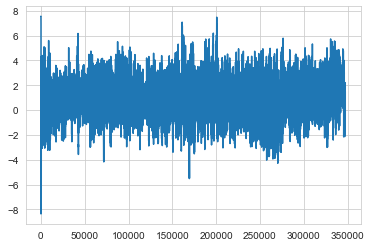

In [8]:
trailer_2022_10['z'].plot(kind='line')
plt.show()

In [9]:
samples = trailer_2022_10[::500]

In [10]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 347000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             695 non-null    int64  
 1   seconds_elapsed  695 non-null    float64
 2   z                695 non-null    float64
 3   y                695 non-null    float64
 4   x                695 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 27.3 KB


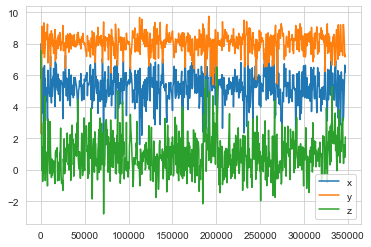

In [11]:
samples[['x', 'y', 'z']].plot()
plt.show()

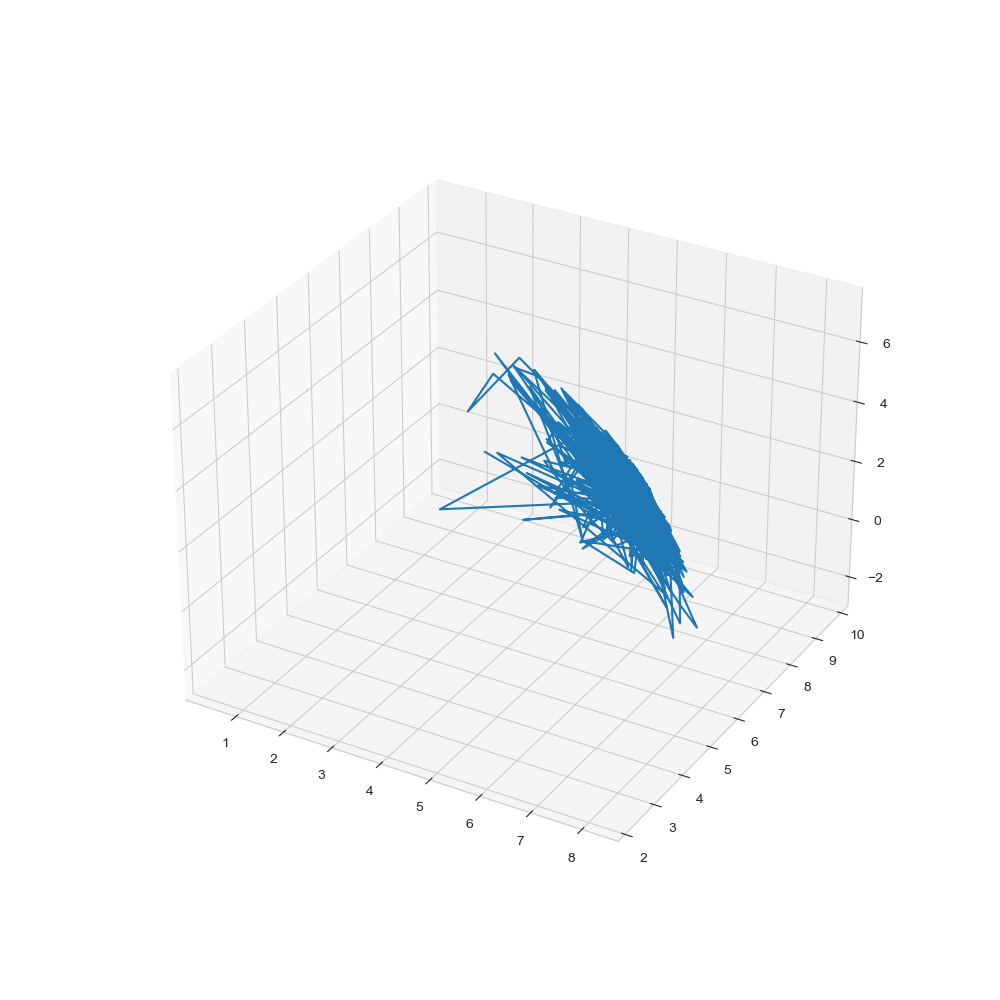

In [12]:
import ipympl

%matplotlib widget
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection = '3d')

zline = samples['z']
xline = samples['x']
yline = samples['y']
ax.plot(xline, yline, zline)
plt.show()


# Converting Time to an Axis Attribute

When plotting the <code>Gyroscope</code> data I naively expected the plot to show two.

In [64]:
 data_sets = ('Accelerometer', 'Annotation', 'Barometer', 'Gravity', 'Gyroscope', 'HeartRate', 'Magnetometer', 'Metadata', 'Orientation', 'WristMotion')

def bulk_df(file_list, folder='raw', filetype='csv',):
    '''
    TEST:
    temporarily removed "folder='raw', filetype='csv'," from parameters to test functionality

    bulk_df( *args, folder='raw', filetype='csv' )
    Imports files and returns one dataframe per file.
        *args = iterable container with file names without the filetype
        folder = string - the folder within the /Data path where the file is located, default = 'raw'
        filetype = string (default = 'csv'): the file type to import without

    Examples 1:
        # Files to import:
        #   C:/Users/Kristopher/OneDrive/Data/raw/file_1.csv
        #   C:/Users/Kristopher/OneDrive/Data/raw/file_2.csv

        datafiles = ['file_1', 'file_2']
        bulk_df(datafiles)

    Examples 2:
        # Files to import:
        #   C:/Users/Kristopher/OneDrive/Data/folder/file_1.json
        #   C:/Users/Kristopher/OneDrive/Data/folder/file_2.json

        datafiles = ['file_1', 'file_2']
        bulk_df(datafiles, 'folder', 'json')

    :param args:
    :param filetype:
    :param folder:
    :return:
    '''
    data_dict = dict(zip(file_list, (i for i in range(0,len(file_list)))))
    folder_path = "C:/Users/Kristopher/OneDrive/Data/[FOLDER]/[FILENAME].[TYPE]"
    for file,index in data_dict:

        datafile_path = folder_path.replace('[FOLDER]', str(folder))\
            .replace('[FILENAME]', str(file))\
            .replace('[TYPE]', str(filetype))\
            .replace('//','/')
        #print(datafile_path)
        #df = pd.read_csv(datafile_path)
        #exec("df%f = %d" % (file, df))

        #print(file, i)
        vars()["df"+file]=pd.read_csv(datafile_path)
        return 'df+file=' +pd.read_csv(datafile_path)
        # return ("df"+file_list[i]] = pd.read_csv(datafile_path)



In [61]:
data_dict = dict(zip(data_sets, (i for i in range(0,len(data_sets)))))

In [62]:
data_dict.value(0)

AttributeError: 'dict' object has no attribute 'value'

In [65]:
bulk_df(data_sets)

ValueError: too many values to unpack (expected 2)

In [ ]:
class Bulk_df(*args, folder='raw', filetype='csv'):
    def __init__(self):

    def df(self):
        folder_path = "C:/Users/Kristopher/OneDrive/Data/[FOLDER]/[FILENAME].[TYPE]"
        for file in args:
            datafile_path = folder_path.replace('[FOLDER]', folder).replace('[FILENAME]', file).replace('[TYPE]', filetype).replace('//','/')

        pd.read_csv

In [36]:
vars?
